In [ ]:
import sys
print(sys.version)

In [ ]:
import mlpy

In [19]:
import random
import pandas as pd
import cufflinks as cf
import numpy as np
import random

In [10]:
df = cf.datagen.lines(4,500)

In [24]:
len(df)

500

In [25]:
def rnd_sample_df(df, n=1, slice_size=1):
    '''
    Yield dataframes generated by randomly slicing df.
    It is different from pandas.DataFrame.sample().
    '''
    assert n > 0 and slice_size > 0
    max_len = len(df)-slice_size
    for _ in range(n):
        i = random.randint(0,max_len)
        yield df.iloc[i:i+slice_size] 

In [30]:
a = list(rnd_sample_df(df, n=3, slice_size=3))
print(len(a))
a[0].head()

3


,IJF.KK,QCQ.QZ,VFM.CH,PVY.TV
2015-01-15,-2.506372,-3.783314,-0.453412,-6.306185
2015-01-16,-3.038083,-1.741328,0.632577,-6.412604
2015-01-17,-3.132822,-1.698988,0.542979,-5.110972


In [ ]:
s = 'ATGGTGCTTGTGGGCACGCAGGATGCCATCAGCGCTGCGAATCCCCGGGTTATCGACGACAGCAGAGCCCGCAAGCTCTCCACAGATCTGAAGCGGTGCACCTACTATGAGACGTGCGCGACCTACGGGCTCAATGTGGAGCGTGTCTTCCAGGACGTGGCCCAGAAGGTAGTGGCCTTGCGAAAGAAGCAGCAACTGGCCATCGGGCCCTGCAAGTCACTGCCCAACTCGCCCAGCCACTCGGCCGTGTCCGCCGCCTCCATCCCGGCCGTGCACATCAACCAGGCCACGAATGGCGGCGGCAGCGCCTTCAGCGACTACTCGTCCTCAGTCCCCTCCACCCCCAGCATCAGCCAGCGGGAGCTGCGCATCGAGACCATCGCTGCCTCCTCCACCCCCACACCCATCCGAAAGCAGTCCAAGCGGCGCTCCAACATCTTCACGGACTTGATTAGAGACCAAGGATTTCGTGGTGATGGAGGATCAACCACAGGTTTGTCTGCTACCCCCCCTGCCTCATTACCTGGCTCACTAACTAACGTGAAAGCCTTACAGAAATCTCCAGGACCTCAGCGAGAAAGGAAGTCATCTTCATCCTCAGAAGACAGGAATCGAATGAAAACACTTGGTAGACGGGACTCGAGTGATGATTGGGAGATTCCTGATGGGCAG'
gc_content(s, percent=True)

In [ ]:
from subprocess import run
import pexpect
from getpass import getpass

def ssl_encrypt(infile, outfile):
    '''(file_path, file_path) => encrypted_file
    Uses openssl to encrypt/decrypt files.
    '''
    pwd = getpass('enter encryption pwd:')
    if getpass('repeat pwd:') == pwd:
        run(f'openssl enc -aes-256-cbc -a -salt -pass pass:{pwd} -in {infile} -out {outfile}',shell=True)
    else:
        print("passwords don't match.")

    
def ssl_decrypt(infile, outfile):
    '''(file_path, file_path) => decrypted_file
    Uses openssl to encrypt/decrypt files.
    '''
    pwd = getpass('enter decryption pwd:')
    run(f'openssl enc -d -aes-256-cbc -a -pass pass:{pwd} -in {infile} -out {outfile}', shell=True)

In [ ]:
infile = 'alefuncs.py'
outfile = 'alefuncs.enc'
print(f'openssl aes-256-cbc -a -salt -in {infile} -out {outfile} -base64')

infile = 'alefuncs.enc'
outfile = 'alefuncs.dec.py'
print(f'openssl enc -d -aes-256-cbc -in {infile} -out {outfile}')

In [ ]:
ssl_encrypt('alefuncs.py','alefuncs.enc')
ssl_decrypt('alefuncs.enc', 'a2.py')

In [ ]:
run(f'openssl enc -aes-256-cbc -pass  -p -in alefuncs.py -out alefuncs.enc -base64',shell=True)


In [ ]:
import socket   #for sockets
import time

class Server:
    def __init__(self):
        self.id = 'server.007'
        self.ssocket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
        self.host = 'localhost'
        self.port = 7899
        
    def start(self):
        start_time = time.time()
        print(f'{self.id} started')
        self.ssocket.bind((self.host, self.port))
        self.ssocket.listen(5) # queue up to 5 requests
        
        try:
            while True:
                # establish a connection
                clientsocket, addr = self.ssocket.accept()      
                print(f'Got a connection from {addr}')
                currentTime = time.ctime(time.time()) + "\r\n"
                clientsocket.send(currentTime.encode('ascii'))
                clientsocket.close()                  
        except KeyboardInterrupt:
            return self.terminate()
        
        
            
    def terminate(self):
        print(f'{self.id} terminated')
        self.ssocket.close()
        

In [ ]:
s = Server()
s.start()

In [ ]:
s.host

In [ ]:
import asyncore

class Handler(asyncore.dispatcher):
    def __init__(self, sock):
        self.buffer = b''
        super().__init__(sock)

    def handle_read(self):
        self.buffer += self.recv(1024)
        print(f'current buffer: {repr(self.buffer)}')


class Server(asyncore.dispatcher):
    def __init__(self, host, port):
        asyncore.dispatcher.__init__(self)
        self.create_socket()
        self.set_reuse_addr()
        self.bind((host, port))
        self.listen(5)

    def handle_accepted(self, sock, addr):
        print(f'Incoming connection from {repr(addr)}')
        Handler(sock)


if __name__ == "__main__":
    server = Server("localhost", 1234)
    asyncore.loop()

In [ ]:
import asyncore, time

class Client(asyncore.dispatcher):

    def __init__(self, host, port):
        asyncore.dispatcher.__init__(self)
        self.create_socket()
        self.connect( (host, port) )
        self.buffer = bytes("hello world", 'ascii')
        self.last_sent = time.time()

    def handle_connect(self):
        pass

    def handle_close(self):
        self.close()

    def handle_read(self):
        print('Re: ', self.recv(1024))

    def writable(self):
        return (len(self.buffer) > 0)

    def writable(self):
        return True

    def handle_write(self):
        sent = self.send(self.buffer)
        if sent:
            print('Sent:', sent)
            self.buffer = self.buffer[sent:]
            self.last_sent = time.time()
        else:
            if time.time() - self.last_sent > 10:
                self.buffer = 'beat'.encode('utf-8')


client = Client('localhost', 1234)
asyncore.loop()

In [ ]:
from pyensembl import EnsemblRelease
#https://github.com/openvax/pyensembl

#release 77 uses human reference genome GRCh38
#release 75 uses human reference genome GRCh37
data = EnsemblRelease(77)


def sequence_from_coordinates(chromosome, strand, start, end, ref_genome=37):
    '''
    Download the nucleotide sequence from the gene_name.
    
    Params:
            strand: "1" for the plus strand and "2" for the minus strand.
            ref_genome: 37 or 38 only (GRCh number)
    
    '''
    Entrez.email = "a.marcozzi@umcutrecht.nl" # Always tell NCBI who you are
    
    if int(ref_genome) == 37:
        #GRCh37 from http://www.ncbi.nlm.nih.gov/assembly/GCF_000001405.25/#/def_asm_Primary_Assembly
        NCBI_IDS = {'1':'NC_000001.10','2':'NC_000002.11','3':'NC_000003.11','4':'NC_000004.11',
                    '5':'NC_000005.9','6':'NC_000006.11','7':'NC_000007.13','8':'NC_000008.10',
                    '9':'NC_000009.11','10':'NC_000010.10','11':'NC_000011.9','12':'NC_000012.11',
                    '13':'NC_000013.10','14':'NC_000014.8','15':'NC_000015.9','16':'NC_000016.9',
                    '17':'NC_000017.10','18':'NC_000018.9','19':'NC_000019.9','20':'NC_000020.10',
                    '21':'NC_000021.8','22':'NC_000022.10','X':'NC_000023.10','Y':'NC_000024.9'}
    elif int(ref_genome) == 38:
        #GRCh38 from https://www.ncbi.nlm.nih.gov/assembly/GCF_000001405.38
        NCBI_IDS = {'1':'NC_000001.11','2':'NC_000002.12','3':'NC_000003.12','4':'NC_000004.12',
                    '5':'NC_000005.10','6':'NC_000006.12','7':'NC_000007.14','8':'NC_000008.11',
                    '9':'NC_000009.12','10':'NC_000010.11','11':'NC_000011.10','12':'NC_000012.12',
                    '13':'NC_000013.11','14':'NC_000014.9','15':'NC_000015.10','16':'NC_000016.10',
                    '17':'NC_000017.11','18':'NC_000018.10','19':'NC_000019.10','20':'NC_000020.11',
                    '21':'NC_000021.9','22':'NC_000022.11','X':'NC_000023.11','Y':'NC_000024.10'}
        
  
    try:        
        handle = Entrez.efetch(db="nucleotide", 
                               id=NCBI_IDS[str(chromosome)], 
                               rettype="fasta", 
                               strand=strand, #"1" for the plus strand and "2" for the minus strand.
                               seq_start=start,
                               seq_stop=end)
        record = SeqIO.read(handle, "fasta")
        handle.close()
        sequence = str(record.seq)
        return sequence
    except ValueError:
        print('ValueError: no sequence found in NCBI')
        return False

In [ ]:
genes = ['SPEN','ANKRD36B','BRAF','AGAP3','SUMF2','EMC1','CHAC1','STK39','GPRC5C','E2F4','CAMK4','ZNF304']
genes_seq = {}
for gene_name in genes:
    d = data.genes_by_name(gene_name)[0]
    s = sequence_from_coordinates(chromosome=d.contig,
                                  strand=1,
                                  start=d.start,
                                  end=d.end,
                                  ref_genome=38)
    genes_seq[gene_name] = s 
print('done')

In [ ]:
for k,v in genes_seq.items():
    print(f'\n>{k}\n{v}')

In [ ]:
data.genes_by_name('ANKRD36B')

In [ ]:
data.genes_by_name('SPEN')

In [ ]:
a= {u'1009': {u'Avg': 188,
      u'amount_spent': 2820,
      u'size': 15,
      u'users': {u'0': 346041,
       u'1': 658546,
       u'2': 658194,
       u'3': 658316
       }},
    u'1056': {u'Avg': 140,
      u'amount_spent': 140,
      u'size': 1,
      u'users': {u'0': 645767}},
     u'1103': {u'Avg': 95,
      u'amount_spent': 285,
      u'size': 3,
      u'users': {u'0': 339285, u'1': 658440}}}
b = {u'1009': {u'Avg': 246.25,
  u'amount_spent': 1970,
  u'size': 8,
  u'users': {u'0': 61496,
   u'1': 1350,
   u'2': 164852,
   u'3': 517760,
   u'4': 576458,
   u'5': 203840,
   u'6': 52239,
   u'7': 516672}},
 u'1056': {u'Avg': 170,
  u'amount_spent': 680,
  u'size': 4,
  u'users': {u'0': 503737, u'1': 624418, u'2': 642471}}}

In [ ]:
def merge_dict(dictA, dictB):
    '''(dict, dict) => dict
    Merge two dicts, if they contain the same keys, it sums their values.
    Return the merged dict.
    
    Example:
        dictA = {'any key':1, 'point':{'x':2, 'y':3}, 'something':'aaaa'}
        dictB = {'any key':1, 'point':{'x':2, 'y':3, 'z':0, 'even more nested':{'w':99}}, 'extra':8}
        merge_dict(dictA, dictB)
        
        {'any key': 2,
         'point': {'x': 4, 'y': 6, 'z': 0, 'even more nested': {'w': 99}},
         'something': 'aaaa',
         'extra': 8}
    '''
    r = {}
    
    common_k = [k for k in dictA if k in dictB]
    common_k += [k for k in dictB if k in dictA]
    common_k = set(common_k)
    
    for k, v in dictA.items():
        #add unique k of dictA
        if k not in common_k:
            r[k] = v
        
        else:
            #add inner keys if they are not containing other dicts 
            if type(v) is not dict:
                if k in dictB:
                    r[k] = v + dictB[k]
            else:
                #recursively merge the inner dicts
                r[k] = merge_dict(dictA[k], dictB[k])
    
    #add unique k of dictB
    for k, v in dictB.items():
        if k not in common_k:
            r[k] = v

    return r
            

In [ ]:
merge_dict(a,b)

In [ ]:
dictA = {'any key':1, 'point':{'x':2, 'y':3}, 'something':'aaaa'}
dictB = {'any key':1, 'point':{'x':2, 'y':3, 'z':0, 'even more nested':{'w':99}}, 'extra':8}
merge_dict(dictA, dictB)

In [ ]:
a.update(b)
a

In [87]:
import pandas as pd
from pandas_datareader import data as pdr
import plotly.plotly as py
import plotly.offline as py_offline
import plotly.graph_objs as go
import fix_yahoo_finance as yf
import numpy as np


def heikin_ashi(O, H, L, C, oldO, oldC):
    '''
    Generates a Heikin-Ashi candle from ticker data.
    '''
    HA_Close = (O + H + L + C)/4
    HA_Open = (oldO + oldC)/2
    elements = np.array([H, L, HA_Open, HA_Close])
    HA_High = elements.max(0) 
    HA_Low = elements.min(0)   
    return np.array([HA_Open, HA_High, HA_Low, HA_Close])


py_offline.init_notebook_mode(connected=True) #use plotly offline
yf.pdr_override() #fix broken yahoo API





#Download 1-DAY data from Yahoo-Finance as a Pandas.DataFrame
df_1D = pdr.get_data_yahoo("BTC-USD", start="2018-01-01", end="2018-05-01")

df_1W = ''



#select the DataFrame you want to work with
df = df_1D


#Build a Heikin-Ashi DataFrame
ha_df = {} #init as a simple dict
dates = df.index
previous_date = False
for n, date in enumerate(dates):
    m = n+1
    try:
        O = float(df.iloc[[m]]['Open'])
        C = float(df.iloc[[m]]['Close'])
        H = float(df.iloc[[m]]['High'])
        L = float(df.iloc[[m]]['Low'])
        oldO = float(df.iloc[[n]]['Open'])
        oldC = float(df.iloc[[n]]['Close'])
        
        ha_df.update({dates[m]:heikin_ashi(O, H, L, C, oldO, oldC)})

    except IndexError:
        print('\ndone')

#convert to a pandas DataFrame
ha_df = pd.DataFrame.from_dict(ha_df, orient='index')
#rename columns
ha_df.rename(columns={0: 'HA_Open',
                      1: 'HA_High',
                      2: 'HA_Low',
                      3: 'HA_Close'},
             inplace=True) #without copying the entire DF, saves RAM



df.head()

[*********************100%***********************]  1 of 1 downloaded

done


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12532.379883,14241.820313,12359.429688,13850.400391,13850.400391,1492142483
2018-01-01,13850.490234,13921.530273,12877.669922,13444.879883,13444.879883,1057521524
2018-01-02,13444.879883,15306.129883,12934.160156,14754.129883,14754.129883,1956783037
2018-01-03,14754.089844,15435.009766,14579.709961,15156.620117,15156.620117,1604206990
2018-01-04,15156.490234,15408.660156,14244.669922,15180.080078,15180.080078,1656714736


In [88]:
import pandas as pd
import numpy as np
from copy import deepcopy

def d2w(df, drop=[]):
    '''
    Return the Week-based version of a Day-based DataFrame.
    The first and/or the last weeks will be discarded
    if the data of all days is not available.
    
    The input df is supposed to have a day-based DatetimeIndex.
        > df.index
        DatetimeIndex(['2017-12-31', '2018-01-01', '2018-01-02', '2018-01-03',
                   '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
                   '2018-01-08', '2018-01-09',
                   ...
                   '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23',
                   '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
                   '2018-04-28', '2018-04-29'],
                  dtype='datetime64[ns]', name='Date', length=120, freq=None)
    
    
    WARNING: Columns aside ['open','high','low','close'] are summed.
    This is ok for data like 'Vlolume' but it is not for data like 'Adj Close'.
    '''
    assert type(df.index) == pd.core.indexes.datetimes.DatetimeIndex
    #get a list of column values, make it lowercase for simplicity
    
    df = df.drop(columns=drop) #make a tmp copy fo the df while dropping unwanted columns
    
    original_columns = list(df.columns.values) #keep original, it will be replaced later on
    columns = [item.lower() for item in original_columns]
    
    
    for n,item in enumerate(columns):
        df.rename(columns={original_columns[n]: item}, inplace=True)


    #check if the basic data is in the df
    required = ['open','high','low','close']
    for item in required:
        assert item in columns
    
    
    #init a weekly dict
    weekly_dict = {'prices':[]}
    for v in columns:
        if v.lower() not in required:
            weekly_dict.update({v:[]})
    #it will look something like {'prices': [], 'Adj Close': [], 'Volume': []}        
    
    df_1W = {}
    monday_found = False
    sunday_found = False
    monday_date  = False
    #sunday_date  = False
    
    for n, date in enumerate(df.index):
        
        if date.weekday() == 0:
            monday_found = True
            monday_date  = date
            
            week_open = float(df.iloc[[n]]['open'])
            wd = deepcopy(weekly_dict)
        
        if monday_found and date.weekday() == 6:
            sunday_found = True
            #sunday_date  = date
            week_close = float(df.iloc[[n]]['close'])
        
        if monday_found:
            for k in required:
                wd['prices'].append(float(df.iloc[[n]][k]))

            for k in wd.keys():
                if k != 'prices':
                    wd[k].append(float(df.iloc[[n]][k]))

                
        if monday_found and sunday_found:
            monday_found = False
            sunday_found = False
            
            data = []
            for k in columns:
                try:
                    if k == 'open':
                        data.append(week_open)
                    elif k == 'close':
                        data.append(week_close)
                    elif k == 'high':
                        data.append(max(wd['prices']))
                    elif k == 'low':
                        data.append(min(wd['prices']))
                    else:
                        data.append(sum(wd[k]))
                except ValueError:
                    print(k)
                    print(wd)
                          
            df_1W.update({monday_date: np.array(data)})    
        
    #convert to a pandas DataFrame
    df_1W = pd.DataFrame.from_dict(df_1W, orient='index')
    
    for n,item in enumerate(columns):
        #rename columns of output dict
        df_1W.rename(columns={n:original_columns[n]}, inplace=True)
        
    return df_1W

In [89]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12532.379883,14241.820313,12359.429688,13850.400391,13850.400391,1492142483
2018-01-01,13850.490234,13921.530273,12877.669922,13444.879883,13444.879883,1057521524
2018-01-02,13444.879883,15306.129883,12934.160156,14754.129883,14754.129883,1956783037
2018-01-03,14754.089844,15435.009766,14579.709961,15156.620117,15156.620117,1604206990
2018-01-04,15156.490234,15408.660156,14244.669922,15180.080078,15180.080078,1656714736


In [90]:
df_1W = d2w(df, drop=['Adj Close'])
df_1W.head(10)

,Open,High,Low,Close,Volume
2018-01-01,13850.490234,17252.849609,12877.669922,16228.160156,1.128145e+10
2018-01-08,16228.259766,16302.919922,12825.950195,13638.629883,1.158798e+10
2018-01-15,13638.629883,14355.820313,9205.379883,11549.929688,1.534770e+10
2018-01-22,11549.980469,12064.190430,9980.500000,11767.740234,9.499053e+09
2018-01-29,11767.740234,11860.290039,7786.200195,8218.049805,1.127239e+10
2018-02-05,8218.049805,9081.490234,5968.359863,8084.609863,1.339695e+10
2018-02-12,8084.609863,11288.339844,8084.410156,10417.230469,8.876227e+09
2018-02-19,10418.120117,11802.230469,9329.440430,9610.110352,1.004258e+10
2018-02-26,9610.110352,11539.790039,9411.820313,11504.419922,6.676953e+09
2018-03-05,11503.940430,11694.150391,8393.450195,9544.839844,9.894020e+09


In [91]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12532.379883,14241.820313,12359.429688,13850.400391,13850.400391,1492142483
2018-01-01,13850.490234,13921.530273,12877.669922,13444.879883,13444.879883,1057521524
2018-01-02,13444.879883,15306.129883,12934.160156,14754.129883,14754.129883,1956783037
2018-01-03,14754.089844,15435.009766,14579.709961,15156.620117,15156.620117,1604206990
2018-01-04,15156.490234,15408.660156,14244.669922,15180.080078,15180.080078,1656714736
2018-01-05,15180.080078,17126.949219,14832.360352,16954.779297,16954.779297,2283988962
2018-01-06,16954.759766,17252.849609,16286.570313,17172.300781,17172.300781,1412703790
2018-01-07,17174.500000,17184.810547,15791.129883,16228.160156,16228.160156,1309532650
2018-01-08,16228.259766,16302.919922,13902.309570,14976.169922,14976.169922,2166366561


In [52]:
print(list(df.columns.values))
original_columns = list(df.columns.values) #keep original, it will be replaced later on
columns = [item.lower() for item in original_columns]

#WARNING here the case of the columns.values of the original df is modified
for n,item in enumerate(columns):
    df.rename(columns={original_columns[n]: item}, inplace=True)
print(list(df.columns.values))

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['open', 'high', 'low', 'close', 'adj close', 'volume']


In [ ]:
#Plot using plotly
df_candle = go.Candlestick(x=ha_df.index,
                           open=ha_df.HA_Open,
                           high=ha_df.HA_High,
                           low=ha_df.HA_Low,
                           close=ha_df.HA_Close,
                           increasing=dict(line=dict(color= '#00FF00')),
                           decreasing=dict(line=dict(color= '#FF0000'))
                          )        
data = [df_candle]

layout = go.Layout(plot_bgcolor='rgb(59,68,75)')

fig = go.Figure(data=data, layout=layout)
py_offline.plot(fig)

In [15]:
print(ha_df.index[0], ha_df.index[0].weekday())

2018-01-01 00:00:00 0


In [81]:
import numpy as np
from matplotlib import pyplot as plt

def compare_representations(r1, r1title, r2, r2title, k):
    ka = np.asarray(range(k)) #ka =3500
    

    #histogram Query
    plt.style.use('ggplot')
    plt.figure(figsize=(13,10))
    hiq = plt.subplot(2,2,1)
    hiq.set_ylim([0, 0.15])
    hiq.set_title("Histogram for " + r1title)
    hiq.set_xlabel("Visual words")
    hiq.set_ylabel("Frequency")
    hist1 = plt.plot(ka,r1,color="orangered")
    

    #histogram Image
    plt.style.use('ggplot')
    plt.figure(figsize=(13,10))
    his = plt.subplot(2,2,2)
    his.set_ylim([0, 0.15])
    his.set_title("Histogram for "+ r2title)
    his.set_xlabel("Visual words")
    his.set_ylabel("Frequency")
    hist2 = plt.plot(ka,r2,color='mediumslateblue')
    

    #histograms compared
    plt.style.use('ggplot')
    plt.figure(figsize=(13,10))
    plt.ylim([-0.15,0.15])
    plt.title("Compare Histograms: ")
    plt.xlabel("Visual words")
    plt.ylabel("Frequency")
    plt.scatter(ka,r1,color="orangered", alpha=0.5)
    plt.scatter(ka,r2,color='mediumslateblue', alpha=0.5)
    plt.show()
    

    return(hist1, hist2)

In [75]:
r1 = '0.00117278904358,0.0,0.0,0.0,0.0,0.0595056654385,0.0,0.0,0.0,0.0788520972524,0.0,0.0,-0.000291317776793,0.0178407681864,0.0,0.0,0.0,0.0,0.0,0.0,0.00847710869468,0.0,0.0,0.0,-0.000145658888396,0.0,0.0,0.0,0.0280915544605,0.0,0.0103704072748,0.0207408145495,0.000876197115459,0.0105456917427,0.00550879532661,0.0,0.0,0.0,0.000878456331732,0.0,0.0127130586969,0.0,0.0,0.0,0.0,0.0,0.0,0.00330265534373,0.0,0.0,0.0,0.0381020432127,0.0418087955393,0.0,0.00648112267607,0.0,0.0,0.0,0.0,0.0126358189311,0.0,0.00631790946556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000291317776793,0.0116088958727,0.0,0.0,0.0368596088782,0.0,0.0,0.0,0.0,-0.00116527110717,0.0,0.0,0.00780396752677,0.0,0.0,0.028331048561,0.0125103373204,0.000146032852577,0.0,0.0186447358444,0.0,0.002840841455,0.0,0.0,0.0,0.0305331209095,0.0307831422564,0.0,0.0192552579652,0.0499717403689,0.0,0.0,0.0112522817589,0.0,0.0,0.0,0.0,0.0,0.0248403973229,0.0377022874737,0.0,0.0,0.0,0.0,0.0339084347787,-0.000582635553585,0.0,0.0162661412693,0.0,0.0,-0.000582635553585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01232890251,0.00238274691313,0.0,0.0,0.147822028553,0.0,0.0,0.0103704072748,0.0,0.0,0.0,0.0150863833877,0.0492738203878,0.0,0.0,0.0,0.0250665597077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0188475159694,0.023722880732,0.0,-0.00145658888396,0.00361262758135,0.0452571097715,0.00784859661092,0.028331048561,0.0246151306331,0.0,0.0,0.0,0.0,0.0,0.0,0.0290556413514,0.0,0.0,0.0,0.0145452776367,0.0,0.0,0.0402788860674,0.0105456917427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00206038415502,0.0,0.044769652992,0.0,0.0,0.0,0.0,0.0,0.0198724043251,0.014204207275,0.0,0.0,0.0,0.0312865062923,0.0,0.030607371474,0.00518834509967,0.0,-0.00131092999557,0.0250665597077,0.0,0.0038566245737,0.0372894716888,0.0,0.0,0.0403079231103,0.0164606021932,0.0224102125177,0.0,0.0,0.0,0.0,-0.00131092999557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000877324783518,0.0,0.0379859776619,0.0,0.0,0.00265598514733,-0.000291317776793,0.0430386762076,0.0,0.00175691266346,0.0,0.0,0.0635887294186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0139830348561,0.0,0.0,0.0726093598833,0.0,0.00330265534373,0.0,0.0,0.0,0.0,0.0,0.000877324783518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0214430360983,0.0,0.0,0.00950199705035,0.0,0.0,0.0,0.0,0.0,0.00330265534373,0.0,0.00648112267607,0.0128749524461,0.00043809855773,0.0,0.0446143937259,0.00691486061905,0.0,0.0,0.0,0.0,0.0,-0.000436976665189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000878456331732,0.0,0.0246151306331,0.0,0.0381020432127,0.0,0.0533507751586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029299238147,0.0,0.0,0.0255216002533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0357551127211,0.0,0.0137968488803,0.0,0.0,0.0,0.0,0.0651765416022,0.0,0.0,0.0220351813064,0.0,0.0243907525716,0.0,-0.00101961221877,0.00147747955809,0.0,0.00299436318068,0.0,0.0230627599979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0409035281843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000292441594506,0.0,0.0272225407276,0.0,0.0,0.0,0.0,0.0,0.0103766901993,0.0,0.0,0.0,0.0,0.0,0.0,0.0226268975982,0.0,0.0,0.0,0.00175918356538,0.0213389988454,0.0,0.0,0.0562775785771,0.0,0.0,0.0,0.0,0.0,0.0013176844976,0.0,0.0207058223831,0.0,0.0,0.0,0.0209160990175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0190510216063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0448204250355,0.0,0.0,0.0,0.0,-0.000728294441981,0.0,0.0,0.0,0.0,0.0,0.0,0.0226788000082,0.0,0.0,0.0,0.0,0.0,-0.000436976665189,0.0,0.0803295768105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0735636182739,0.0,0.0,0.0219793031475,0.0297895839841,0.0,0.0,0.0,0.0,0.0,-0.000728294441981,0.0,0.0,0.000730164262883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00117278904358,0.0,0.0,0.0,0.0,0.0,0.0,0.0290556413514,0.0,0.0,0.0,0.010195661316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0038566245737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0425094968438,0.0,0.0278530645311,0.0,0.0,0.0,0.0215516337279,0.0,0.0,0.0,0.0,-0.00131092999557,0.0,0.000730164262883,0.0,0.0,0.0475655909602,0.019665943972,0.0235551479337,0.0535958809075,0.0,0.0,0.0,0.0,0.0590919925982,0.0,0.021127155901,0.0,0.0283396645625,0.0,0.00146788526527,0.0,0.0,0.0439788590154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0269617336025,0.0,0.0459071713023,0.0571431106491,0.0,0.0,0.032306798489,0.0338723954386,0.03494059143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00175918356538,0.0,0.0,0.0,0.0,0.0,0.0,0.0566712117386,0.0539713262629,0.0,0.0,0.0,0.0,0.0,-0.00101961221877,0.0,0.0,0.0,0.0336084517407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0117880448864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0278530645311,0.0,0.0,0.0,0.00392429830546,0.0748400103659,0.0,0.0,0.0,0.0,0.00293197260896,0.0,0.0,0.0785611515294,0.0866560647792,0.0,0.0338723954386,0.0,0.0,-0.00262185999113,0.0,0.0,0.0,0.0259803105203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0336084517407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0436637348585,0.0,0.0,0.028331048561,0.0,0.00847537246462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0188475159694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0689699313002,0.0239446344821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0310342674539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0506783303851,0.000439228165866,0.0,0.0,0.0,0.0,0.0,0.0164606021932,0.0,0.0,0.0,0.0,0.0,0.015565035299,0.0,0.0,0.0,0.0898696879056,0.0,0.0,0.0,0.0,0.0,0.00747036091159,0.0449348439528,0.0,0.0,0.0,0.0430386762076,0.0809314847007,0.0,0.0506783303851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015303685737,0.0139830348561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0176415393843,0.0164606021932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0249242252814,-0.000145658888396,0.0427287039699,0.0,0.00753649894008,0.0,0.0,0.0,0.0,0.0,0.0,0.0539713262629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000292065705153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0574667458931,0.0,0.0300363512468,0.0,0.0,0.0,0.0328238908215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0130581402528,0.0,0.0352830787686,0.0,0.0,0.0285715553245,0.0,0.0,0.0,0.0,0.0363046799416,0.0379859776619,0.000584131410306,0.0,0.0517549511362,0.0452571097715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0137968488803,0.0204963202499,0.0,0.0,0.0,0.0,0.0,0.00361262758135,0.0,0.0,0.0762856575044,0.0,0.0,0.00408077643671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699591695357,0.0,0.00631790946556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023722880732,0.0,0.0,0.0442957387477,0.0,0.0,0.0,0.0,0.0,0.0116088958727,0.0,0.0,0.0,0.0,0.0,0.0389204606251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0119677599327,0.0,0.0,0.0250665597077,0.0,-0.000291317776793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0224102125177,0.0,0.0,0.0210913834854,0.0,0.0,0.0,0.0,0.0624888086242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000292065705153,0.0,0.0,0.00177763732501,0.0,0.0513938085589,0.0168515299508,0.0,0.0,0.0,0.0228444113043,0.0179786440605,-0.000728294441981,0.00534834454367,0.0,0.037420005183,0.0,0.0,0.0659379094424,0.00103019207751,0.0656371090161,0.0,0.0452571097715,0.0,0.0266753875793,0.0,0.0,0.0141698322813,0.0,0.0,0.0,0.0,0.0,0.00162736044807,0.0338723954386,0.0,0.0,0.0,0.0,0.0,0.0194602303126,0.0137968488803,0.0,0.0,-0.000873953330378,0.0,0.00973938024303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0860773524151,0.0,0.0,0.0,0.0290556413514,0.0129622453521,0.0,0.0,0.0,0.0,0.0,0.0224102125177,0.0,0.109385218162,0.0,0.0,0.0,0.0,0.0,0.0,0.0194602303126,0.00967462165882,0.0,0.00566970000204,0.0,0.0,0.0,0.0,0.0,-0.00218488332594,0.0,0.0209160990175,0.0108978895543,0.0,0.0,0.0,0.0,0.0633706831083,0.0192552579652,0.0,0.0,0.0,0.0,0.0,0.0,0.0126923527232,0.0,0.0,0.0,0.00376824947004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00813954233395,0.0,0.0651765416022,0.0,0.0,0.0170480060178,-0.000291317776793,0.0,0.0,0.047230016153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00176374896824,0.0,0.0,0.0,0.0,0.00784859661092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00566970000204,0.0,0.0465647481618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00345743030953,0.0,0.0,0.0,0.0,0.0,0.002840841455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0325647570483,0.0,0.0,0.0,0.0,0.0,0.0,0.00615516324628,0.0,0.0,0.0,0.0,-0.00116527110717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00177763732501,0.0,0.137125661848,0.0,0.0,0.0,0.0,0.0215516337279,0.0,0.0,0.0,0.0,0.0,0.0,0.135523308991,0.0132419199437,0.0,0.0204963202499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0273790637477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00238274691313,0.0,0.0,0.0,0.0,0.0280915544605,0.0,0.0,0.0,0.0360292326003,0.0,0.0,0.0,-0.000145658888396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0219793031475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0344039858951,0.0,0.0278530645311,0.0,0.0,0.0147339337461,0.0,0.124977617248,0.0243907525716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00355527465001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0333457271866,0.0,0.0,0.0,0.0,0.0,0.029543882674,0.0,0.0,0.029299238147,0.010837882744,0.0,0.0,0.0,0.0,0.0,0.0,0.0901043790113,0.0,0.0,0.0,0.0,0.0252936249388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0354823075707,0.0,0.0180406972668,0.0297895839841,0.0,0.0,0.0,0.0,0.015303685737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0213389988454,0.0,0.0,0.0,0.0624888086242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0321446858105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0479031573209,0.0,0.0521184013494,0.000878456331732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021127155901,0.0,0.024167256155,0.0,0.000292441594506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0119677599327,0.0228444113043,0.00831754979307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0280915544605,0.0,0.0693433117413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0532228975065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0162661412693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0539713262629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699591695357,0.0,0.0,0.0492738203878,0.0,0.0,0.0,0.0,0.00443243867427,0.0,0.0,0.119160020363,0.0,0.0624888086242,0.0,0.0,0.0521184013494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064613596978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0586813065914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00898724453418,0.00146788526527,0.0,0.0,0.0,0.0901090537403,0.0,0.0,0.0,0.0,0.0,0.0,0.0276155703872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02644275018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103692494575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018241331566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0312865062923,0.0209160990175,0.0,0.0,0.0,0.0603421476437,0.0,0.0,0.00847537246462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0176333807778,0.0,0.0,0.0,0.0424204118069,0.0,0.0,0.0,0.0,0.0,0.0325647570483,0.0,0.0,-0.000582635553585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0424204118069,0.0,0.0,0.0635887294186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0993484175024,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00780396752677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0922783926082,0.0,0.0,0.0468964095378,0.0,0.0,0.0188475159694,0.0,0.0194602303126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0846831583977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000728294441981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0170480060178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0554983915314,0.0719908056745,0.0,0.0,0.0,0.0,0.008522524365,0.0151131335828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0456888226087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0532228975065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105527484832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056662097122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0198724043251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0633706831083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00910562077844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0873292059471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142222780361,0.0,0.0,0.0,0.0,0.0,-0.00116527110717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000728294441981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0661014362055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0424204118069,0.0,0.0,0.0,0.0,0.0635887294186,0.0252936249388,0.0,0.0,0.0132419199437,0.0,0.0,0.0,0.0259803105203,0.0,0.0,0.0,0.0,0.0,0.0,0.077983687028,0.0,0.0,0.0,0.0,0.0,0.061191115118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0719908056745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0312865062923,0.0,0.0,0.0,0.029846435328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0492738203878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0106966890873,0.0,0.0,0.0136112703638,0.0,0.0,0.0,0.0,0.0,0.0116088958727,0.0,0.000878456331732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00116527110717,0.0,0.0,0.0,0.0,0.0,0.0751811613473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0156971932218,0.0,0.0,0.0,0.0,0.0315398686926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000292441594506,0.0,0.0,0.0134262953558,0.0,0.0344039858951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000873953330378,-0.00160224777236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0119677599327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0363046799416,0.0,0.0279660697122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0288130833513,0.0,0.0,0.0633706831083,0.0,0.00713869953554,0.0,0.0,0.0,0.0280915544605,0.0,0.0,0.0,0.0,0.0013176844976,0.0,0.0,0.0,0.0,0.00578493686055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0297895839841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0446143937259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0190510216063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00797150745596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00314830039192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0119677599327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0479031573209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0449348439528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0357551127211,0.0,0.0,0.0,0.000584883189012,0.0,0.0134262953558,0.0,0.0,0.0103722909286,0.0,0.0,0.00361262758135,0.0893977889951,0.0,0.0,0.0,0.0,0.0382710898621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0172451631124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0297895839841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0126923527232,0.0,0.0,0.0496217099422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06292803679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0154948784038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0433503469317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0273790637477,0.0,0.0,0.00192831228685,0.0,0.0,0.0,0.0,0.0,0.0661014362055,0.0517549511362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0993484175024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0603421476437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0333457271866,0.0,0.0815398302305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0285715553245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0848408236138,0.0,0.0,0.0,0.0,0.0,0.0,0.0535958809075,0.0,0.0,0.0,0.0,0.0542870728693,0.0,0.0,0.0,0.0665695850609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0459071713023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0633706831083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0638168011978,0.0,0.0,0.0,0.085990796788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00518834509967,0.0,0.0,0.0,0.00864664612224,0.0,0.0,0.0,0.0430386762076,0.0853332199285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000292065705153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0243907525716,0.0853332199285,0.0,0.0,0.0,0.0,0.0,0.0,0.109385218162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0357551127211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0735636182739,0.0,0.0,0.0809314847007,0.0,0.0,0.0,0.0,0.0,0.0,0.028331048561,0.0,0.0,0.0809314847007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0656371090161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00132799257366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0317943647093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129530427638,0.0,0.0,0.0,0.0,0.0,0.0873292059471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0827763955579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06292803679,0.0,0.0076369196392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0898696879056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0204963202499,0.0,0.0,0.0,0.0,0.0,0.0,0.0834049076416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0656371090161,0.0,0.0,0.0,0.0,0.0,0.0,0.0436637348585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0346716558707,0.0,0.10646766764,0.0,0.0503239381805,0.0,0.0,0.0,0.0689699313002,0.0,0.0,0.0,0.0,0.0,0.0,0.0172451631124,0.00295495911618,0.0953126994456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029299238147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0893977889951,0.0,0.0,0.0076051065933,0.0,0.0,0.0496217099422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0110175906532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0403079231103,0.0,0.0,0.00691486061905,0.0,0.0,0.0679976039508,0.0574667458931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0873292059471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061191115118,0.0,0.0762856575044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0290905552734,0.0,0.0,0.0,0.0,0.0,0.0,0.0452571097715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0409035281843,0.0,0.0273790637477,0.0,0.0,0.0,0.0204963202499,0.0,0.0,0.0,0.0,0.0,0.00147747955809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0762856575044,0.0,0.0,0.0,0.0689699313002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0901043790113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0252936249388,0.0,0.0,0.0,0.0,0.0468964095378,0.0,0.0,0.0,0.0797339717365,0.000292065705153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0675176030867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144028638855,0.0,0.0360292326003,0.0846831583977,0.0,0.0462350094711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0326936686629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0300363512468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0922783926082,0.0,0.0704603160801,0.0,0.0853332199285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0170480060178,0.0,0.0,0.0,0.0,0.0,0.0,0.0312865062923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107423652577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0257499048922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0689699313002,0.0,0.0,0.0,0.0,0.0,0.0,0.0382710898621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0'
r2 = '0.00221771088961,0.0,0.0,0.0190177586065,0.0134679225564,0.0250052287197,0.0102096037907,0.0222233298748,0.0,0.0331349076142,0.0,0.011604502675,-0.00030604092842,0.00749697504848,0.0,0.0197518197662,0.0220546923964,0.00396889795946,0.0,0.00164905267371,0.0178110806955,0.0,0.00735091439821,0.0209989215017,-0.000979330970944,0.0215964972129,0.00205152836693,0.0,0.0472180750657,0.00712443227818,0.00435781036833,0.0217890518417,0.000368191988345,0.0132944030837,0.00231488356776,0.00586082830566,0.0150248680508,0.0,0.00110742404106,0.0,0.00356148654756,0.00861288033645,0.0,0.0,0.0,0.0,0.0441093847928,0.00971479877598,0.0,0.0,0.0,0.032022171274,0.0175687220243,0.0,0.00272347101207,0.0100619169187,0.0100619169187,0.0,0.0,0.00530977244108,0.0,0.00530977244108,0.0201296699462,0.0,0.0,0.0,0.0,0.0228384276408,0.0155424038125,0.0159623130433,0.0,0.0,-0.000183624557052,0.00487824301,0.0116229384258,0.0,0.015488994934,0.0422938412673,0.00110742404106,0.0,0.108404108699,-0.00104053915663,0.0,0.0,0.00983805448558,0.0,0.00518080127082,0.0,0.0,0.000368191988345,0.0,0.015669630136,0.00316695693349,0.00358130052737,0.0,0.0,0.025893873204,0.0128305038897,0.0258711336866,0.0242154334049,0.0485481971435,0.0,0.0140124058605,0.0,0.00945677615489,0.0,0.0,0.00587589403793,0.00247695741664,0.0,0.0104383307366,0.0316862038123,0.019987819183,0.0,0.00910850201759,0.0257134815293,0.00356221613909,-0.00146899645642,0.0,0.0,0.0,0.0,-0.000856914599576,0.0,0.0,0.0,0.0,0.0195672490927,0.0,0.0106866484173,0.0362656088958,0.0020025364343,0.0,0.00925953427102,0.0,0.0,0.0175687220243,0.00871562073666,0.00950818288464,0.0,0.0,0.00211317955684,0.0207056444057,0.0,0.00932641939692,0.00178074327378,0.0105333677741,0.00495352427994,0.0,0.0798881121774,0.00572246766813,0.0,0.0263672318356,0.00817749883676,0.008350700924,0.0,0.0237600795223,0.00996873245975,0.0153305963255,-0.00220349468462,0.0015180836696,0.0190177586065,0.00824526336857,0.0,0.0,0.0,0.0,0.0,0.0125419476674,0.0170503345425,0.0140124058605,0.0,0.0107245830615,0.0164451937787,0.0,0.0183364722376,0.0,0.0111116649374,0.00564194322938,0.0265888061674,0.0222093970365,0.0140124058605,0.0,0.0,0.0236090375329,0.0,0.0344515213458,0.0327699878015,0.0102493828479,0.0172257606729,0.00158347846675,0.00216451562499,0.0,0.0188129215011,0.0,0.0,0.00369372333145,0.0,0.0058114692129,0.008350700924,0.00596883421228,0.00870091647077,0.0,0.0,0.0394412652937,0.00377658334683,0.0128617051599,0.00436045055334,0.0,-0.00110174734231,0.0,0.0451411303916,0.00324123018677,0.0,0.0,0.00983805448558,0.0508140945487,0.027668029232,0.0188342567228,0.0225218430993,0.0,0.0,0.0118045187664,-0.000856914599576,0.0,0.0,0.0164451937787,0.0157711292069,0.00555131358628,0.0,0.0,0.000983108939816,0.0251803341436,0.0159623130433,0.0,0.0,0.00279021819165,-0.00110174734231,0.0,0.0,0.000553712020529,0.0178257329248,0.0210667355483,0.0267209972595,0.0,0.0275817590032,0.0145695822196,0.0,0.0,0.00969133920959,0.0,0.014993950097,0.0117517880759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00122888617477,0.0,0.0,0.0,0.00627097383371,0.0482463651975,0.0,0.0357154740099,0.0134679225564,0.0,0.0238141461137,0.025893873204,0.0139647421072,0.0,0.0135160581299,0.0,0.0238103160066,0.00399289055567,0.0074098275551,0.0103616025416,0.0,0.0,0.0166903424246,0.0124904555691,0.0118045187664,0.0,0.0,0.000429557319736,0.0,0.0187476790838,0.00290573460645,0.00171480727763,0.0102610961276,0.0316862038123,0.00800554281849,0.0098759098831,-0.000489665485472,0.0145695822196,0.0,0.0,0.00826394299409,0.0,0.0,0.0316801060297,0.000738282694038,0.0208518331393,0.0310310102531,0.0,0.016011085637,0.0,0.0112094228792,0.0,0.0,0.0,0.0171883142581,0.0,0.0160821217325,0.0117043014982,0.0,0.0159623130433,0.0,0.0,0.00758098843356,0.0123120066935,0.0,0.0250052287197,0.0,0.0,0.00627097383371,0.0131470884312,0.0291892071695,0.0243173601412,0.0,0.0231906228975,0.0182165064808,0.0300497361017,0.023159261766,0.0,0.0,0.0246588199977,0.0015180836696,0.0229983063871,0.0,0.0,0.0,0.0115744178388,0.0045177128839,0.0204987656958,0.049248026774,-0.000795706413892,0.00124172090192,0.0,0.00880795382352,0.0197518197662,0.0193826784192,0.0,0.0394412652937,0.0,0.0112094228792,0.0,0.00349118552679,0.0,0.0171883142581,0.0,0.00443146769457,0.0,0.0175687220243,0.00870091647077,0.0,0.0,0.0,0.0,0.0680388336589,0.0200180818083,0.0329590397945,0.0140124058605,0.0,0.000614443087385,0.0175687220243,0.0,0.0128305038897,0.0,0.0,0.0723421499068,0.0,0.00436045055334,0.0,0.0159623130433,0.0,0.0,0.0,0.0169380315162,0.00950818288464,0.0177559350562,0.0137384004796,0.0,0.00172488624748,0.00896698730864,0.0197066184873,0.00571967267495,0.047297470375,0.0,0.00185048632875,0.0,0.0,0.0,0.000922853367548,0.0326471118827,0.0,0.0421018949229,0.0326471118827,0.0,0.0087892780629,0.0,0.0157711292069,0.00754967470587,0.0,0.0,0.0207056444057,0.00837675951053,0.0,0.0214491661231,0.016011085637,0.0503606682871,0.0,0.0239807097387,0.0123120066935,0.00225885644195,0.0154998126682,0.0,0.0275817590032,0.0,0.0559472005886,0.0,0.0,0.0,0.0,0.0273684595305,0.0166903424246,0.0,0.0,-0.000979330970944,0.0,0.0414112888113,0.0328903875573,0.0,0.00978344638888,0.0147961411049,0.00476499655213,0.0,0.0,0.0,0.0,0.0,-0.00061208185684,0.0,0.0,0.0,0.0130410936524,0.0,0.0,0.0289822640288,0.00975648602,0.0151400575916,0.0126335196004,0.0164451937787,0.0525175860334,0.0,0.0,0.0,0.00923605337833,0.0125180578269,0.0187476790838,0.0,0.0,0.0,0.0248313968012,-0.000979330970944,0.0117216566113,0.0184721067567,0.000552287982518,0.0190163657693,0.0165674538071,0.0,0.00758098843356,0.0,0.0190163657693,0.00395929938616,0.00320336017388,0.0,0.0,0.0,0.0088779675281,0.0179552822037,0.0187476790838,0.0,0.0450746041525,0.0,0.0,0.0128531379967,0.0,0.0132535553487,0.0,0.0,0.008350700924,0.0,0.0,0.0,0.0,0.00243092264008,0.0374953581676,0.0,0.0,0.0168138661282,0.0281719564821,0.0,0.0,0.0,0.0110143051961,0.0,0.0303239537342,0.0,0.0144571030311,0.0,0.0188823373749,0.0390892969064,0.0,0.0238175571689,0.0,0.0117043014982,0.0,0.00221771088961,0.0,0.00905633987419,0.00914602772219,0.0,0.0122096434388,0.0242154334049,-0.001162955528,0.0164451937787,6.13653313909e-05,0.0,0.0214491661231,0.019987819183,0.0330557719764,0.00395929938616,0.0,0.01572448239,0.0,0.00643085257997,0.0424613270111,0.0,0.0,0.0177559350562,0.0300353763635,0.0178631678766,0.0,0.0012336575525,0.013834014616,0.0109173404244,0.036961234545,0.00978344638888,0.0096274659338,0.0,0.0,0.0,0.0,0.0332577962317,0.0,0.0,0.0125419476674,0.0,0.00377658334683,0.0,0.0,0.0120062227773,0.0132535553487,0.0284674405029,0.0135758314686,0.0427011607543,0.0146825932266,0.0,0.0156064486516,0.0,0.0220286103921,0.0022474595923,0.0,0.01572448239,0.00613875680305,0.0,0.0,0.000492824642136,0.0,0.0228384276408,0.0315923218579,0.0,0.0315923218579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00061208185684,0.00683529172944,0.0394132369745,0.0,0.0,0.0,0.0,0.0605602303664,0.0182165064808,0.0186137751848,0.00556446574356,0.0,0.0,0.0340086993508,0.00495352427994,0.0504870134497,0.0,0.0,0.0,0.0,0.00238753368491,0.0260756366917,0.0,0.0680173987016,0.0388067005298,0.0141228069042,0.00923605337833,0.0372275503697,0.006999003215,0.0269009619259,0.0,0.0,0.0543924760183,0.0117043014982,0.0,0.0,0.0,0.00989431604228,0.03144896478,0.0,0.00784114085909,0.00342036537588,0.0,0.00172488624748,0.0,0.0,0.0330126475858,0.0364142591094,0.0,0.0284674405029,0.0,0.0107245830615,-0.00250953561304,0.0,0.0,0.0,0.0109173404244,0.00941712836138,0.008350700924,0.0,0.0,0.0,0.0137931219055,0.0283719725735,0.0282456138083,0.0615600334675,0.0178257329248,0.0270057845437,0.0,0.0,0.0307442311288,0.0,0.0,0.0,0.00211317955684,0.0206873401688,0.0119051580033,0.0,0.00356148654756,0.0,0.0,0.0619559797359,0.0,0.0431929944258,0.0139025124097,0.0,0.0,0.0,0.0,0.0219009826484,0.00792002650742,0.00941749404044,0.0,0.0,0.0257134815293,0.0,0.00369372333145,0.013834014616,0.00837675951053,0.0,0.0,0.0,0.023159261766,0.0289822640288,0.0,0.0,0.0300353763635,0.0201296699462,0.00110742404106,0.0,0.0252435067248,0.0,0.0260821873049,0.0234844611151,0.0,0.0266293707258,0.0,0.00969133920959,0.0151400575916,0.00732982902853,0.0,0.0,0.0212958418846,0.000922853367548,0.0,0.0,0.0,0.0,0.0,0.006917007308,0.0,0.0,0.025893873204,0.0117043014982,0.0242154334049,0.00654067583001,0.0,0.0233213083762,0.0,0.0,0.00603314318042,0.006917007308,0.0,0.0,0.00238249827606,0.0282524821213,0.0377646747497,0.0,0.0,0.0,0.0542566124301,0.0340086993508,0.0,0.0212958418846,0.0,0.0,0.0,0.0,0.0,0.0,0.0195668927778,0.0220286103921,0.0,0.0201238338374,0.0,0.0,0.0,0.00587589403793,0.0,0.0,0.0,0.0,0.0,0.0,0.0456245859489,0.0,0.0179552822037,0.0,0.00587589403793,0.0,0.0,0.0,0.0,0.0,0.0,0.0236487351875,0.0,0.0,0.0148265118631,0.013834014616,0.0204159222711,0.0,0.00871562073666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0217482550779,0.0,0.0,0.0,0.0,0.0,0.0229958944883,0.0186137751848,0.0319246260866,0.0104735565804,-0.000428457299788,0.0179552822037,0.0,0.00475043540024,0.0225218430993,0.0,0.00428437933224,0.0124148102217,0.0,0.0114061464872,0.0453592224393,0.0141228069042,0.0,0.00502904340579,0.00990704855988,0.0087892780629,0.00774990633412,0.0,0.0119087785844,0.0247918289823,0.000306826656955,0.0238141461137,0.0177559350562,0.0,0.0,0.0140124058605,0.0,0.00495352427994,0.0207056444057,0.0,0.0,0.0,0.0,0.0,0.0252435067248,0.0,0.0,0.0150248680508,0.0413793657166,0.0,0.0267209972595,0.0,0.0,0.0,0.0120062227773,0.0,0.0164617157679,0.0,0.0222397677946,0.0,0.0,0.0240124455547,0.0,0.0,0.0,0.0,0.0152558049531,0.0159623130433,0.000613653313909,0.0,0.0,0.0190177586065,0.0425916837691,0.0,0.0,0.0122096434388,0.0,0.0248296204433,0.0,0.0,0.0,0.0,0.0173929671731,0.0172257606729,0.0,0.00399289055567,0.0,0.0267209972595,0.0188342567228,0.00759041834799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0383079029465,0.0,0.015488994934,0.0,0.0,0.0255344411158,0.0199644527783,0.0,0.0,0.00530977244108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039874929839,0.0358583786263,0.0030361673392,0.0,0.0,0.00960639620472,0.0,0.0,0.0,0.00487824301,0.0,0.0,0.0,0.0,0.0248313968012,0.0245324965103,0.0,0.00758098843356,0.0,0.0302516835724,0.0226796112196,0.00450535270996,0.00221771088961,0.00286123383407,0.00502904340579,0.0,0.0,0.0316001033224,0.0336277322563,-0.00030604092842,0.0,0.0123120066935,0.0,0.0322919361971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0519433360024,0.0,0.0,0.0,0.0149989764279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0136842297653,0.0402593398924,0.0194286876412,0.0525175860334,0.0184806172725,0.0,0.0346288906683,0.0,0.0,0.025893873204,0.0,0.0,0.0,0.000736383976691,0.0207056444057,0.0,0.00224097458107,0.032164243465,0.0,0.0283251255216,0.0493176399954,0.0,0.0,0.0,0.0125915211459,-0.00061208185684,0.00449491918461,0.0,0.01572448239,0.0,0.0,0.0184721067567,0.00129870937499,0.0,0.0,0.0190177586065,0.0098759098831,0.0112094228792,0.0216415348611,0.0114061464872,0.00595438929221,0.00510480189535,0.0304699662168,0.0689949191612,0.0320564487411,0.0203109321854,0.00547074231181,0.0142337202514,0.0128305038897,0.044730219063,0.0,0.023159261766,0.00530977244108,0.0,0.0,0.0207056444057,0.121879864867,-0.000979330970944,0.0173144453341,0.00204632137773,0.0,0.0,0.0,0.0,0.0,0.0285736765844,0.00587589403793,0.0250052287197,0.0,0.0,0.0,0.0,0.0,0.0251803341436,0.0239807097387,0.0250052287197,0.0,0.0,0.0,0.0194286876412,0.0,0.0,0.0163408260724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0127259007318,0.0,0.00370491377755,0.032164243465,0.0140124058605,0.00817749883676,0.0,0.00738744666291,0.00714749482819,0.0315923218579,0.0118045187664,0.0,0.0,0.0,-0.00177503738484,0.0,0.0087892780629,0.00457946682655,0.0,0.0,0.0,0.0,0.0266293707258,0.00809136619059,0.0174412455437,0.0427011607543,0.0,0.0,0.0,0.0,0.0106670576825,0.0,0.0139647421072,0.0230102376336,0.00633391386699,0.0,0.0,0.0,0.0,0.0,0.0378632956917,0.0,0.00684073075176,0.0,0.0,0.0165278859882,0.0293503391666,0.0143276875084,-0.00030604092842,0.039975638366,0.0,0.0,0.0,0.0,0.0,0.121586800706,0.0,0.0,0.0,0.00148231083646,0.0262587930167,0.0,0.00327935149519,0.0102493828479,0.00989431604228,0.0107245830615,0.0174412455437,0.0,0.0088779675281,0.0413793657166,0.0,0.0,0.0,0.0936382747589,0.0,0.00800554281849,0.0,0.000983108939816,0.0,0.00952999310426,0.0,0.0195672490927,0.0,0.00544694202414,0.0,0.0275817590032,0.0,0.0065918079589,0.0133990177714,0.0,0.0,0.0312128973033,0.015518985997,0.0,0.0,0.00145286730322,0.0,0.0,0.0,0.0422938412673,0.0,0.00358130052737,0.0,0.0,0.0145695822196,0.0136842297653,0.0,0.0,0.0,0.0,0.015669630136,0.0,0.0,0.0,0.0,0.0173144453341,0.0,0.0,0.0,0.0178631678766,0.0,0.0,0.0,0.0,0.0,-0.0018974537562,0.0,0.0,0.0,0.0,0.0345227360108,0.0,0.0,0.0,0.0,0.0,0.0,0.0388573752823,0.0345227360108,0.0,0.0281719564821,0.0182165064808,0.0,0.0,0.0641128974821,0.0,0.0300353763635,0.0,0.0,0.00373495763512,0.0,0.0,0.0186137751848,0.0212958418846,0.0,0.0,0.0271690196226,0.0,0.0,0.031363594912,0.0139025124097,0.0,0.0,0.0,0.0166933972307,0.0,0.00861288033645,0.0217482550779,0.0,0.0,0.0275817590032,0.0215964972129,0.0,0.0,0.0345153564505,0.0330126475858,0.00683529172944,0.0,0.00724669230663,0.0,0.0,0.0,0.00500634108576,0.0,0.0,0.0,0.0,0.0118045187664,0.0225218430993,0.0,0.0,0.0151400575916,0.00573949039613,0.00837675951053,0.0,-0.000550873671156,0.0,0.0,0.0291391644392,0.0,0.00472838807745,0.0309126044862,0.0,0.0,0.0,0.00218022527667,0.0461802668916,0.0239807097387,0.0,0.0,0.0479614194773,0.0,0.0300353763635,0.0,0.0578284121243,0.0,0.0117043014982,0.0,0.0,0.0123828674311,0.0123828674311,0.0262587930167,0.0102493828479,0.0394058814479,0.0,0.0,0.0105333677741,0.0,0.0,0.00562774062496,0.00224097458107,0.0,0.0324050679889,0.0,0.0321737491846,0.0088779675281,0.0,0.0208518331393,0.00978344638888,0.0,0.0387768508436,0.0280248117211,0.0,0.0,0.0,0.0,0.0,0.0124148102217,0.0,0.0,0.0,0.0030361673392,0.0,0.0,0.0,0.0,0.00741325593155,0.0,0.0757265913833,0.0,0.0,0.0,0.0255344411158,0.0212575684041,0.0162025339944,0.0250052287197,0.0357154740099,0.0208518331393,0.0,0.0,0.0250052287197,0.0,0.0,0.0,0.0158431019062,0.0,0.00641831062253,0.0,0.0,0.0,0.0125180578269,0.0,0.0,0.0,0.0,0.0128617051599,0.0148196551102,0.00265488622054,0.0,0.0,0.0745461964255,0.0,0.0,0.0,0.0295922822099,0.01491023098,0.0,0.0,0.0,0.00861288033645,0.0127015590574,0.0,0.00896698730864,0.0,0.0504870134497,0.0,0.0,0.0,0.0,0.0291391644392,0.0,0.0,0.0,0.0,0.0337692728453,0.0,0.0,0.0,0.0315923218579,0.0,0.0,0.0,0.0,0.0,0.0300353763635,0.0,0.0,0.0127259007318,0.0219009826484,0.00332227212317,0.0,0.0,0.0,0.0,0.00817749883676,0.0,0.0,0.0,0.0,0.00800554281849,0.032164243465,0.0088779675281,0.0,0.0,0.0,0.000491554469908,0.0277768766863,0.0220286103921,0.0,0.0,0.0,0.0186528387938,0.0,0.0,0.00502904340579,0.0,0.00349516694639,0.0,0.00370491377755,0.0,0.0,0.0,0.0,0.0217482550779,0.0,0.0,0.0118045187664,0.0,0.0145695822196,0.0,0.0,0.0,0.0,0.0,0.0304699662168,0.0,0.0,0.0144571030311,0.0355852124136,0.0413988506083,0.0223651095315,0.0,0.0,0.00950818288464,0.0,0.0105333677741,0.0,0.0,0.0,0.0,0.0600707527271,0.0,0.0195672490927,0.0,0.0369833760782,0.0,0.0,0.0,0.0,0.0277768766863,0.0,0.0,0.0,0.0,0.0226796112196,0.0,0.00213052464167,0.0,0.0291892071695,0.0,0.0,0.0,0.0,0.0,0.0103436700844,0.0,0.0,0.0,0.0,0.0,0.0293979576968,0.0202723675847,0.0,0.0,0.0071638437542,0.0992340265115,0.0575255940841,0.0,0.00124172090192,0.0,0.0,0.100145878261,0.0,0.0,0.0,0.008350700924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0271516629372,0.0,0.0,0.0158431019062,0.0,0.0578727744575,0.023159261766,0.0,0.0,0.0156064486516,0.0327699878015,0.0,0.0,0.0233213083762,0.00915893365309,0.0,0.0112094228792,0.0,0.0,0.00308414388125,0.0193826784192,0.0,0.0337557680652,0.0126217533624,0.0,0.0,0.0,0.0,0.0,0.0330126475858,0.0,0.0,0.0,0.0,0.0195672490927,0.0,0.0173144453341,0.0,0.0,0.0,0.00871562073666,0.0,0.0143451506791,0.0106866484173,0.0,0.0,0.0,0.0,0.0377646747497,0.0,0.0145695822196,0.0,0.0,0.0,0.0,0.0,0.0,0.0202615637072,0.0,0.0,0.0,0.00766529816277,0.0251803341436,0.0,0.0,0.0,0.0,0.0,0.011604502675,0.00587589403793,0.0,0.0,0.0197066184873,0.0,0.0,0.0,0.0,0.011604502675,0.0,0.0,0.0,0.0,0.0477044898338,0.0,0.0,0.0128617051599,0.0,0.00534222982134,0.0277768766863,0.0,0.0205603443628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0190177586065,0.0111147413326,0.0325297668504,0.0,0.0146825932266,0.0,0.0,0.0,0.0,0.0340086993508,0.0,0.0136842297653,0.0,0.0,-0.00122416371368,0.0,0.0191991712192,0.0256610077795,0.0,0.0,0.0,0.0,0.00826394299409,0.0,0.0,0.0,0.0127259007318,0.0,0.0,0.0191991712192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0563439129641,0.0463884629629,0.0,0.0,0.0,0.0,0.0,0.0262587930167,0.0264433636902,0.0107245830615,0.0,0.0,0.0,0.0,0.0,0.0,-0.001162955528,0.0,0.0,0.0900839613422,0.0,0.0,0.0,0.0,0.00905633987419,0.0,0.0,0.0,0.00766529816277,0.0,0.0342643358352,0.0,0.0,0.00327935149519,0.0,0.0,0.0,0.0556567507135,0.0,0.0,0.0,0.0,0.0,0.0281719564821,0.0,0.0,0.0306902607113,0.0,0.0,0.0,0.016011085637,0.0197066184873,0.0,0.0,0.00792002650742,0.0,0.0,0.0,0.0168755498253,0.0159623130433,0.0,0.0,0.0248296204433,0.0,0.0,0.0388573752823,0.0,0.0,0.0,0.0,0.05976427834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0015302046421,0.0505761531579,0.0,0.0,0.0214491661231,0.0142337202514,0.0150248680508,0.0,0.0279736002943,0.0186528387938,0.0,0.0,0.0214456968171,0.0,0.0,0.0,0.0,0.0,0.0396936106046,0.03816395102,0.0,0.0,0.0,0.0,0.0,0.0,0.0233213083762,0.0,0.0,0.0,0.0,0.0201296699462,0.00238753368491,0.0254031181148,0.0,0.0,0.0,0.0,0.0,0.0,0.0256610077795,0.0191991712192,0.0,0.0,0.0237600795223,0.00724669230663,0.0,0.0229983063871,0.0,0.0,0.0439556750448,0.0,0.0165674538071,0.0,0.0,0.0,0.0,0.0437087466588,0.0,0.0,0.0,0.0,0.0,0.0886886609868,0.0,0.01951297204,0.0,0.0,0.0,0.0,0.0,0.0,0.0176968820281,0.0,0.0,0.0,0.0,0.016701401848,0.00845271822735,0.0238103160066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0400519149222,0.0,0.0,0.031363594912,0.033402803696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0638251683255,0.0,0.0,0.0,0.0266293707258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00956581732689,0.0,0.0,0.0,0.0,0.0,0.0505761531579,0.0251803341436,0.0,0.0,0.0,0.0,0.00675385456907,0.0,0.0,0.0178257329248,0.0,0.0,0.0,0.10768110404,0.0,0.0,0.0,0.00162061509338,0.0,0.0,-0.000795706413892,0.0,0.0,0.0,0.0,0.0,0.0508140945487,0.0613068640963,0.0562941693802,0.0,0.0,0.0,0.0,0.0,0.0,0.0364330129616,0.0225218430993,0.0,0.0,0.0,0.0,0.0,0.0,0.0127259007318,0.0,0.0,0.0,-0.000244832742736,0.00173161249999,0.0,0.0206873401688,0.056949053728,0.0500729391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0140124058605,0.0,0.0113075822921,0.0,0.0302801151832,0.0,0.0366971237533,0.0,0.0246588199977,0.0178257329248,0.0194286876412,0.0435732383508,0.0,0.0,0.0133604986298,0.010628784202,0.0,0.0,0.0,0.0,0.0493176399954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0733942475066,0.0407158960478,0.0583152417578,0.0,0.0257134815293,0.0,0.0372730982128,0.0,0.0384684364555,0.0151619768671,0.0,0.0,0.0332577962317,0.0,0.0,0.0,0.0,0.0,0.0563439129641,0.0,0.0173144453341,0.0,0.0,0.0,0.0,0.0131470884312,0.0,0.0481597756651,0.0394412652937,0.0125419476674,0.0,0.0463884629629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0207056444057,0.0174412455437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00449491918461,0.0,0.0,0.0114393453499,0.0,0.0,0.031363594912,0.0,0.0186137751848,0.00487824301,0.024624013387,0.000922853367548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000795706413892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00861288033645,0.0,0.0291892071695,0.0,0.0,0.0,0.0431929944258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0239807097387,0.0,0.0556567507135,0.0,0.0,0.0,0.0162025339944,0.0,0.011543368716,0.0,0.0,0.0417477879507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0486239025482,0.000737331704862,0.0,0.0,0.0112838864588,0.0,0.0,0.0,0.0,0.0337557680652,0.0,0.0,0.0,0.0,0.031363594912,0.0,0.00480319810236,0.0,0.0,0.0271690196226,0.0197066184873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000734498228208,-0.00159141282778,0.0,0.0,0.0,0.0,0.0277768766863,0.0,0.0,0.00990704855988,0.0270057845437,0.0124148102217,0.0,0.0100580868116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0428262468238,0.0,0.0748826955649,0.0,0.0,0.0,0.0,0.0124148102217,0.0423684207125,0.0186528387938,0.0,0.0,0.0,0.0,0.0,0.0342643358352,0.0,0.0,0.0,0.0178257329248,0.0,0.0,0.0,0.0,0.0117517880759,0.0,0.00316695693349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0217482550779,0.0798881121774,0.0,0.0119991811423,0.0,0.0,0.0,0.0,0.00534222982134,0.0324050679889,0.0,0.0468191373795,0.0018457067351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0275817590032,0.008350700924,0.0,0.0424613270111,0.0,0.0,0.0,0.0125180578269,0.0,0.0,0.0,0.0,0.0,0.0309126044862,0.0,0.0,0.0,0.0,0.0318232587603,0.0,0.0413988506083,0.0,0.0428262468238,0.0,0.0,0.016011085637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0413988506083,0.0,0.00627097383371,0.0,0.0417477879507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0100492633285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00724669230663,0.00396889795946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0188129215011,0.0,0.0100580868116,0.0164617157679,0.0431968245329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0516155248867,0.0184806172725,0.0236487351875,0.0532645775604,0.0,0.0,0.0439556750448,0.0,0.0,0.0,0.0,0.0188823373749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0345227360108,0.0,0.0,0.0,0.0,0.0,0.0287770972459,0.0,0.0459654115039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0325297668504,0.0,0.0270057845437,0.0204159222711,0.0,0.0,0.0,0.0413988506083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0150248680508,0.0,0.0,0.0378632956917,0.000491554469908,0.0397267155731,0.0169258296881,0.0197066184873,0.0,0.0058114692129,0.0,0.0164451937787,0.0015180836696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0421018949229,0.0875676215086,0.0,0.0,0.0,0.0,0.0,0.0,0.0375663753088,0.00186258135288,0.0,0.0197066184873,0.00837675951053,0.0517183504219,0.0,0.0342643358352,0.0,0.0,0.0144933846133,0.0,0.0,0.0285736765844,0.0411206887255,0.0226796112196,0.0,0.0111116649374,0.0164451937787,0.0,0.0,0.0,0.0,0.0143451506791,0.0807631998417,0.0,0.0,0.0388067005298,0.0,0.0,0.00783481506798,0.0,0.0,0.0459654115039,0.0,0.0,0.0,0.0,0.0,0.0,0.0394058814479,0.0,0.0,0.0,0.0,0.0,0.0266676442063,0.0,0.0271962380091,0.0,0.0,0.0,0.0134679225564,0.0,0.00558450634035,0.011604502675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00735091439821,0.0164451937787,0.0,0.0130223895697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0364330129616,0.0,0.0,0.0,0.0201296699462,0.0,0.0171883142581,0.0186528387938,0.0,0.0532645775604,0.0,0.0,0.0,0.0330126475858,0.0126217533624,0.0,0.0,0.0115051188168,0.0,0.0,0.00243092264008,0.0,0.026816836655,0.0,0.0,0.0,0.0,0.0,0.0,0.0243173601412,0.0375663753088,0.0,0.00449491918461,0.0842037898457,0.0,0.0,0.0,0.0447394102892,0.0,0.0,0.0,0.0144571030311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0481597756651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0277768766863,0.0394058814479,0.0,0.0141228069042,0.0,0.0296085474595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0479614194773,0.0140124058605,0.0,0.0342643358352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0469689222302,0.0400519149222,0.0,0.0,0.0,0.0187476790838,0.0,0.0,0.0,0.0190177586065,0.0,0.0,0.0333349948122,0.0,0.0,0.0,0.0315923218579,0.0,0.0,0.0,0.0794534311462,0.0,0.0,0.0,0.0,0.0366963941618,0.0,0.0,0.0407158960478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0300353763635,0.0287770972459,0.0192909248192,0.0,0.0,0.0,0.0,0.0,0.0,0.0184806172725,0.0,0.0,0.0108207674306,0.0,0.0,0.0,0.0,0.0,0.0378632956917,0.00197964969308,0.0347839602879,0.0279736002943,0.0,0.0,0.0,0.0,0.0,0.0,0.0700961421592,0.0,0.0,0.0,0.0,0.0158431019062,0.0,0.05976427834,0.0,0.0,0.0,0.0,0.0,0.0468191373795,0.0,0.0,0.0,0.0278050248194,0.0,0.0,0.0,0.026816836655,0.0,0.0,0.0,0.0,0.0,0.0,0.0166903424246,0.0,0.0,0.0,0.025893873204,0.0,0.0234844611151,0.0,0.0,0.0,0.0417477879507,0.0,0.0,0.0174418022134,0.0,0.0302516835724,0.0,0.00363345846739,0.0257134815293,0.0,0.0,0.0180855374767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0503606682871,0.0,0.0,0.0,0.0145338338696,0.0,0.00204632137773,0.0,0.000552287982518,0.011604502675,0.0,0.05976427834,0.0,0.0,0.0322919361971,0.0,0.0,0.0,0.0126217533624,0.0,0.0,0.0,0.0,0.0,0.016011085637,0.0,0.0204987656958,0.0,0.0,0.0,0.0,0.0,0.01572448239,0.0414112888113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0431929944258,0.0,0.0,0.0,0.0,0.00754967470587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056949053728,0.0358583786263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0125419476674,0.0,0.0486239025482,0.0,0.0,0.0,0.0162025339944,0.0,0.0,0.0,0.0304699662168,0.0,0.0,0.0,0.0,0.0527021567069,0.0,0.0,0.0,0.0,0.0,0.0300497361017,0.0345227360108,0.0,0.0,0.0,0.0,0.0264433636902,0.00533352884126,0.0,0.0197066184873,0.0,0.0,0.0,0.0,0.0175687220243,0.0,0.0,0.0,0.00817749883676,0.0,0.0275817590032,0.0,0.0,0.0,0.0,0.0,0.046318523532,0.0,0.0,0.00147847392641,0.0229983063871,0.0,0.00223217455332,0.0,0.0,0.0,0.0134679225564,0.0255344411158,0.0596420183116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0109744771786,0.0,0.0,0.0282456138083,0.0,0.0,0.00587589403793,0.0,0.0,0.0,0.0,0.0361347028998,0.0,0.0,0.0,0.0,0.0550358902626,0.0,0.0,0.0238103160066,0.0,0.0,0.0,0.0544307494988,0.0,0.0,0.0,0.0,0.0226796112196,0.0,0.0,0.0,0.0,0.0,0.0,0.0296085474595,0.0,0.0,0.0222093970365,0.0375663753088,0.0136842297653,0.0,0.0,0.0,0.0,0.0291892071695,0.0,0.0236487351875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0490972206575,0.0,0.0397267155731,0.0,0.0,0.0,0.0,0.0,0.0397267155731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0387768508436,0.0,0.0,0.0255344411158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0320564487411,0.0,0.0,0.0,0.0,0.0,0.0556567507135,0.0,0.0,0.0096274659338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0220546923964,0.0275817590032,0.0,0.0596420183116,0.0990379427573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0098759098831,0.0126217533624,0.0327699878015,0.00861288033645,0.0,0.0228384276408,0.0,0.0,0.0576223879287,0.0,0.0,0.0493176399954,0.0298210091558,0.0,0.00945677615489,0.0173144453341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0355852124136,0.0153721155644,0.0158431019062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0291391644392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062117171643,0.0320564487411,0.0,0.0481597756651,0.0144933846133,0.00248344180383,0.0,0.0,0.0,0.0,0.0,0.0,0.0954089796676,0.0,0.0353151328909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0322919361971,0.0,0.0123120066935,0.0435732383508,0.0287770972459,0.0,0.0244192868776,0.0,0.0,0.0165278859882,0.0,0.0,0.0,0.0,0.00472838807745,0.0,0.0,0.0,0.0031957869625,0.0,0.0283719725735,0.0,0.0,0.0,0.0241484422407,0.0,0.05976427834,0.047297470375,0.0,0.0109173404244,0.0,0.0,0.0,0.0,0.0,0.0421018949229,0.00462976713551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0325297668504,0.0320564487411,0.0,0.0,0.0,0.0496627936024,0.0169380315162,0.0,0.0,0.00290573460645,0.0,0.0,0.0,0.0,0.0,0.0158431019062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0439556750448,0.0,0.0,0.125454379648,0.0,0.0,0.0,0.0,0.0428262468238,0.0,0.0,0.0,0.0,0.0,0.0,0.0260756366917,0.0,0.016396757476,0.0,0.0188823373749,0.0,0.0,0.0,0.0217482550779,0.00611215741254,0.0,0.00724669230663,0.0180855374767,0.0,0.0,0.0435732383508,0.0190177586065,0.0287770972459,0.0,0.0234844611151,0.0,0.0,0.0133453878722,0.0,0.0,0.0,0.0,0.0166903424246,0.0,0.0223651095315,0.0,0.0,0.0,0.0,0.0195672490927,0.0,0.0,0.0293979576968,0.0238141461137,0.0129355668433,0.0,0.0,0.0171883142581,0.0,0.0115051188168,0.0,0.0,0.0405447351693,0.0172257606729,0.0,0.0,0.0,0.0,0.0,0.00248344180383,0.0421018949229,0.0,0.0,0.0088779675281,0.0,0.0,0.0364142591094,0.0117043014982,0.0,0.0171883142581,0.0,0.0410549341216,0.0,0.0,0.0,0.0,0.0643370904513,0.0,0.0,0.0,0.00611215741254,0.0204192075814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0378632956917,0.0,0.0,0.0,0.0,0.00959958560959,0.0,0.0505761531579,0.0,0.0,0.0,0.0,0.0,0.0,0.0402593398924,0.0,0.0,0.0394132369745,0.0,0.0,0.0285736765844,0.0,0.000490922651127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0266293707258,0.0,0.05363367331,0.0,0.0,0.0,0.0212958418846,0.0,0.0,0.0,0.0150248680508,0.0,0.0400519149222,0.0,0.0,0.0,0.0,0.0,0.0145695822196,0.0,0.0,0.0,0.0,0.0364142591094,0.0,0.0,0.0255344411158,0.0,0.0,0.0,0.0,0.0,0.019987819183,0.0,0.0,0.0,0.0,0.0,0.0228384276408,0.0,0.0226796112196,0.0,0.0,0.0,0.0,0.0447394102892,0.0,0.0,0.0,0.0,0.0201296699462,0.0211469206337,0.0,0.0170628452904,0.0151400575916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0102493828479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0204159222711,0.0,0.0,0.0,0.0,0.0,0.0,0.000122888617477,0.0,0.023159261766,0.0,0.0,0.0,0.0,0.0,0.0,0.0273882212377,0.0104383307366,0.0,0.0,0.0,0.0,0.0,0.0,0.0216415348611,0.0246588199977,0.0,0.0842037898457,0.0,0.00457946682655,0.0,0.0,0.0139025124097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0204159222711,0.0,0.0,0.0,0.0403815999208,0.0538405520199,0.0,0.031363594912,0.0257134815293,0.0,0.0388573752823,0.0,0.0126217533624,0.0,0.0,0.0,0.0,0.0257134815293,0.0,0.0318232587603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0320564487411,0.0,0.0,0.0,0.0143276875084,0.0,0.0,0.0,0.0,0.0,0.0,0.0131470884312,0.0,0.0,0.0,0.0,0.0,0.0275817590032,0.0,0.0,0.0,0.0,0.0,0.0129355668433,0.0,0.0,0.0184721067567,0.0315923218579,0.0,0.0,0.0,0.0,0.0,0.0251452170289,0.0610232198126,0.0,0.0,0.0,0.0,0.0,0.0650595337008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0162307804625,0.0,0.0266293707258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0455497178359,0.0,0.0,0.0,0.0,0.0,0.0168138661282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0257134815293,0.0451411303916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0383079029465,0.0,0.0273882212377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0194286876412,0.0,0.00500634108576,0.0176968820281,0.0,0.0,0.0162025339944,0.0,0.0121077167024,0.0322919361971,0.0,0.0,0.0,0.0,0.0,0.0,0.0239807097387,0.0,0.0,0.0'

r1 = np.array([float(n) for n in r1.split(',')])
r2 = np.array([float(n) for n in r2.split(',')])
k = max([len(r1),len(r2)])
ka = np.asarray(range(k))

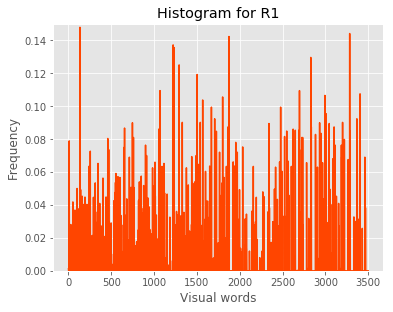

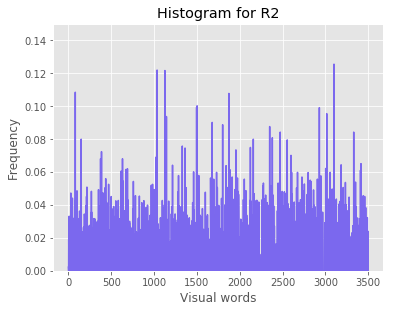

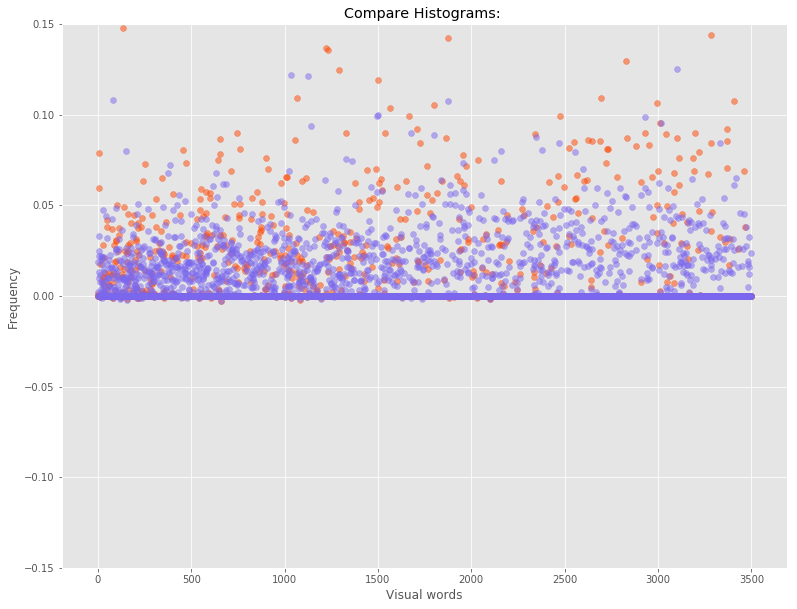

([<matplotlib.lines.Line2D at 0x13d0d3358>],
 [<matplotlib.lines.Line2D at 0x13c521c88>])

In [82]:
compare_representations(r1=r1, r1title='R1', r2=r2, r2title='R2', k=3500)

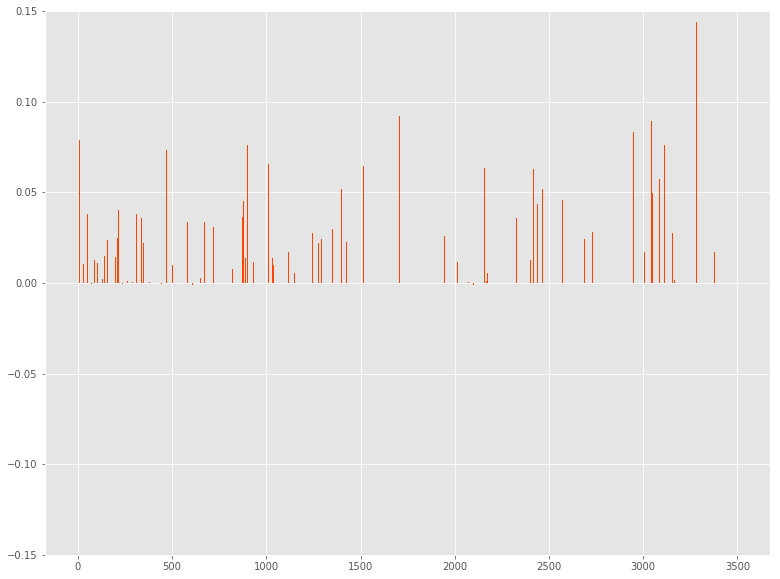

In [84]:
plt.style.use('ggplot')
plt.figure(figsize=(13,10))
plt.ylim([-0.15,0.15])
plt.bar(ka,r1,color ='orangered')
plt.show()

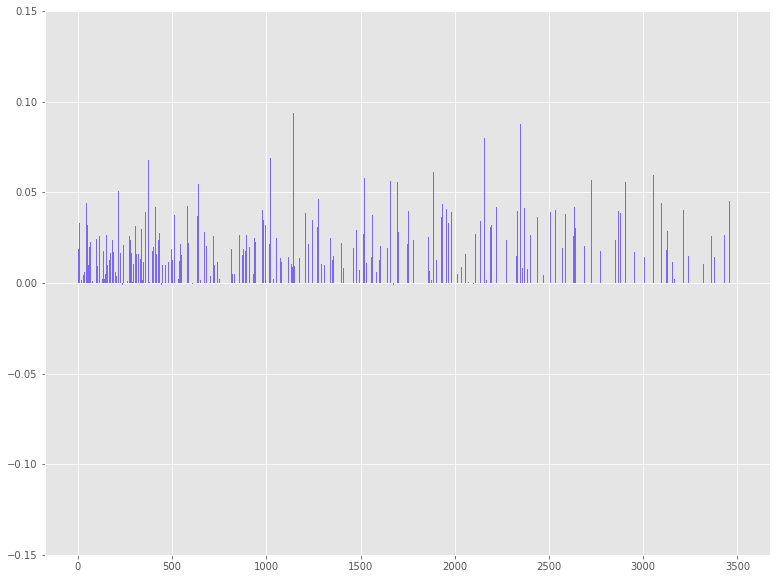

In [85]:
plt.style.use('ggplot')
plt.figure(figsize=(13,10))
plt.ylim([-0.15,0.15])
plt.bar(ka,r2,color = 'mediumslateblue')
plt.show()

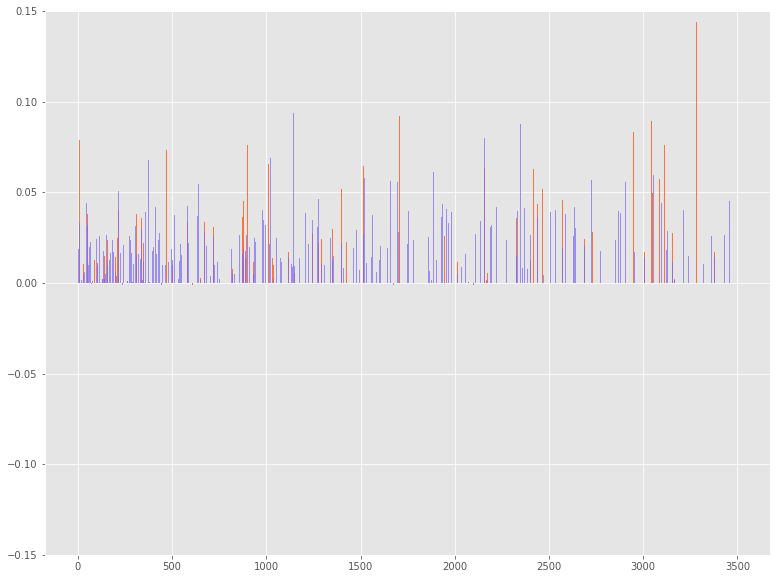

In [87]:
plt.style.use('ggplot')
plt.figure(figsize=(13,10))
plt.ylim([-0.15,0.15])
plt.bar(ka,r1,color ='orangered', alpha=0.7)
plt.bar(ka,r2,color = 'mediumslateblue', alpha=0.7)
plt.show()

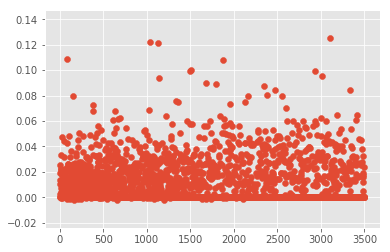

In [63]:
plt.scatter(ka,r2)